<a href="https://colab.research.google.com/github/ta3map/StudentNeuralNetwork/blob/main/StudentsNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict next grades from previous

Example data

In [14]:
!git clone https://github.com/ta3map/StudentNeuralNetwork

fatal: destination path 'StudentNeuralNetwork' already exists and is not an empty directory.


In [15]:
import pandas as pd
import numpy as np

df = pd.read_excel('/content/StudentNeuralNetwork/example_dataset.xltx', skiprows = 0)

# make all columns as str
df.columns = df.columns.astype(str)

df

,year,2018,2018.1,2018.2,2019,2019.1,2019.2,2019.3,2020,2020.1,2020.2
0,student,math,physics,history,computer science,literature,music,electricity,management,economics,circuit design
1,1,5,4,3,5,3,3,5,3,3,4
2,2,4,4,4,4,3,4,4,4,4,4
3,3,2,3,5,2,5,5,2,2,5,3
4,4,5,5,4,5,4,4,5,5,4,5
5,5,3,4,3,3,3,3,4,3,3,3
6,6,5,4,3,4,5,3,4,3,3,5
7,7,3,3,4,3,4,4,3,4,4,3
8,8,4,2,2,2,3,2,4,2,2,4
9,9,4,4,4,4,4,4,4,4,4,4


Choose the year

In [16]:
year = 2018
# Find column whose name contains a specific string - year
spike_cols = [col for col in df.columns if str(year) in col]
print(list(df.columns))
print(spike_cols)

['year', '2018', '2018.1', '2018.2', '2019', '2019.1', '2019.2', '2019.3', '2020', '2020.1', '2020.2']
['2018', '2018.1', '2018.2']


In [17]:
# extract grades from this year
df[spike_cols].to_numpy()[1:-1].astype(int)

array([[5, 4, 3],
       [4, 4, 4],
       [2, 3, 5],
       [5, 5, 4],
       [3, 4, 3],
       [5, 4, 3],
       [3, 3, 4],
       [4, 2, 2],
       [4, 4, 4]])

In [18]:
df[spike_cols].to_numpy()[0].astype(str)

array(['math', 'physics', 'history'], dtype='<U7')

a function for getting data from the year

In [19]:
# function for getting data from the year
def getYear(df, year):
  spike_cols = [col for col in df.columns if str(year) in col]
  data_out = df[spike_cols].to_numpy()[1:-1].astype(int)
  columns = df[spike_cols].to_numpy()[0].astype(str)
  return data_out, columns

first_year, first_columns = getYear(df, 2018)
second_year, second_columns = getYear(df, 2019)
third_year, third_columns = getYear(df, 2020)

ouput_size = np.size(second_year, 1)
input_size = np.size(first_year, 1)
R = [];
j = 0 # output index 
for i in range(input_size):  # input index
  r = np.corrcoef(first_year[:, i], second_year[:, j])
  R.append(r[0, 1])

print('how ', first_columns, ' predicts', second_columns[j], ':')
print(R)

how  ['math' 'physics' 'history']  predicts computer science :
[0.7926290870042669, 0.8512565307587486, 0.02786391062876759]


In [20]:
from numpy.linalg import norm

# 'music' from 'math' and 'history'
R = np.array([-0.5,  1, 0.5, 0.6, -1])
grades_in = np.array([5, 4, 5, 2, 4])

Rp = R.copy()
#Rp[Rp<0] = 0
p_cond = np.where(Rp>0)
Rbp = Rp[p_cond]/norm(Rp[p_cond])
Rp[Rp<0] = 0

Rn = R.copy()
n_cond = np.where(Rn<0)
Rbn = Rn[n_cond]/norm(Rn[n_cond])

print(R[p_cond], norm(Rbp*grades_in[p_cond]), R[n_cond], norm(Rbn*grades_in[n_cond]))
grade_out = norm(Rp*grades_in)/norm(Rp)
grade_out

[1.  0.5 0.6] 3.8359204520278722 [-0.5 -1. ] 4.219004621945797


3.8359204520278722

Predictive function for all grades

In [21]:
first_year, first_columns = getYear(df, 2018)
second_year, second_columns = getYear(df, 2019)

def learnGrades(first_year, second_year):
  ouput_size = np.size(second_year, 1)
  input_size = np.size(first_year, 1)
  R2 = [];
  for j in range(ouput_size): # output index 
    R1 = [];  
    for i in range(input_size):  # input index
      r = np.corrcoef(first_year[:, i], second_year[:, j])
      R1.append(r[0, 1])
    R2.append(R1);
  return np.array(R2)

R2 = learnGrades(first_year, second_year)
print(R2)

def predictGrades(grades_in, R2):
  ouput_size = np.size(R2, 0)
  G = [];
  for j in range(ouput_size):
    R = R2[j]
    R[R<0] = 0# avoid negative correlation
    grade_out = norm(R*grades_in)/norm(R)
    G.append(grade_out)
  return np.array(G)

grades_in = np.array([2, 4, 4])

print('how ', first_columns, grades_in, ' predicts')
print(second_columns, ':')
predictGrades(grades_in, R2)

[[ 0.79262909  0.85125653  0.02786391]
 [-0.17392527  0.05773503  0.52915026]
 [-0.46315109  0.27277236  1.        ]
 [ 0.88034084  0.57032343 -0.52610428]]
how  ['math' 'physics' 'history'] [2 4 4]  predicts
['computer science' 'literature' 'music' 'electricity'] :


array([3.22964701, 4.        , 4.        , 2.74727504])

Second year

In [22]:

# data in
first_year, first_columns = getYear(df, 2018)
second_year, second_columns = getYear(df, 2019)
third_year, third_columns = getYear(df, 2020)

# first step learning
grades_in = np.array([3, 3, 5])# 'math' 'physics' 'history'
R2 = learnGrades(first_year, second_year)
predicted_second_year = predictGrades(grades_in, R2)
#print(first_year, second_year, R2, 2018)

# second step learning
grades_in = np.concatenate((grades_in, predicted_second_year))
previous_grades = np.concatenate((first_year, second_year), 1)
previous_grades_columns = np.concatenate((first_columns, second_columns), 0)
R3 = learnGrades(previous_grades, third_year)
print(R3, '-R3')
predicted_third_year = predictGrades(grades_in, R3)
prediction_rates = [R2, R3]

print('how ', previous_grades_columns, grades_in, ' predicts')
print(third_columns, ':', predicted_third_year)
print(predicted_third_year.astype(int))
prediction_rates

[[ 0.39528471  0.72168784  0.33071891  0.70034929 -0.05        0.33071891
   0.44901326]
 [-0.46315109  0.27277236  1.          0.02786391  0.52915026  1.
  -0.52610428]
 [ 0.89331482  0.49236596 -0.26189246  0.64441198  0.1492405  -0.26189246
   0.67010963]] -R3
how  ['math' 'physics' 'history' 'computer science' 'literature' 'music'
 'electricity'] [3.         3.         5.         3.00152907 4.9811409  4.88794095
 3.        ]  predicts
['management' 'economics' 'circuit design'] : [3.33626057 4.89861332 3.03063222]
[3 4 3]


[array([[0.79262909, 0.85125653, 0.02786391],
        [0.        , 0.05773503, 0.52915026],
        [0.        , 0.27277236, 1.        ],
        [0.88034084, 0.57032343, 0.        ]]),
 array([[0.39528471, 0.72168784, 0.33071891, 0.70034929, 0.        ,
         0.33071891, 0.44901326],
        [0.        , 0.27277236, 1.        , 0.02786391, 0.52915026,
         1.        , 0.        ],
        [0.89331482, 0.49236596, 0.        , 0.64441198, 0.1492405 ,
         0.        , 0.67010963]])]

# Learning Function
get learning coefficients from a dataset

In [23]:
def learnFromFile(filepath):
  df = pd.read_excel(filepath, skiprows = 0)
  df.columns = df.columns.astype(str)# make all columns as str

  # get years
  columns = df.columns.to_numpy().astype(str)
  years = np.unique([int(columns[i][0:4]) for i in range(1, np.size(columns))])
  print('learning...')

  R = []
  previous_grades = []
  for i in range(np.size(years)-1):
    current_year = years[i]
    next_year = years[i+1]
    current_year_grades ,_ = getYear(df, current_year)
    next_year_grades ,_ = getYear(df, next_year)
    if i >0:
      previous_grades = np.concatenate((previous_grades, current_year_grades), 1)
    else:
      previous_grades = current_year_grades.copy()

    r = learnGrades(previous_grades, next_year_grades)
    #print(current_year_grades, next_year_grades, r, current_year)
    R.append(r)
  return R

filepath = '/content/StudentNeuralNetwork/example_dataset.xltx'
R = learnFromFile(filepath)
print(np.shape(np.asarray(R)), np.shape(np.array(prediction_rates)))
print(R, 'R')
print('-----')
print(prediction_rates)

learning...
(2,) (2,)
[array([[ 0.79262909,  0.85125653,  0.02786391],
       [-0.17392527,  0.05773503,  0.52915026],
       [-0.46315109,  0.27277236,  1.        ],
       [ 0.88034084,  0.57032343, -0.52610428]]), array([[ 0.39528471,  0.72168784,  0.33071891,  0.70034929, -0.05      ,
         0.33071891,  0.44901326],
       [-0.46315109,  0.27277236,  1.        ,  0.02786391,  0.52915026,
         1.        , -0.52610428],
       [ 0.89331482,  0.49236596, -0.26189246,  0.64441198,  0.1492405 ,
        -0.26189246,  0.67010963]])] R
-----
[array([[0.79262909, 0.85125653, 0.02786391],
       [0.        , 0.05773503, 0.52915026],
       [0.        , 0.27277236, 1.        ],
       [0.88034084, 0.57032343, 0.        ]]), array([[0.39528471, 0.72168784, 0.33071891, 0.70034929, 0.        ,
        0.33071891, 0.44901326],
       [0.        , 0.27277236, 1.        , 0.02786391, 0.52915026,
        1.        , 0.        ],
       [0.89331482, 0.49236596, 0.        , 0.64441198, 0.149240

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


# Prediction Function 
predict trajectory using file with grades

In [26]:
import io
import pickle

def predictByFile(filepath, prediction_rates):
  st_df = pd.read_excel(filepath, skiprows = 0)# read student's data
  st_df.columns = st_df.columns.astype(str)# make all columns as str

  # get years
  columns = st_df.columns.to_numpy().astype(str)
  years = np.unique([int(columns[i][0:4]) for i in range(np.size(columns))])
  print(years)
  years = np.delete(years, -1) # we don't need the last year
 

  overal_grades = [];
  overal_columns = [];
  for i in range(np.size(years)):
    year = years[i]
    R = prediction_rates[i]# current 'neural network'

    # get grades  
    spike_cols = [col for col in st_df.columns if str(year) in col]
    data_out = st_df[spike_cols].to_numpy()[1, :].astype(float)
    current_year_grades = data_out.copy()

    # names of the subject
    columns = st_df[spike_cols].to_numpy()[0].astype(str)
    overal_columns = np.concatenate((overal_columns, columns), 0)
    
    if i > 0:
      # remove nan values by previously predicted grades
      nan_cond = np.where(np.isnan(current_year_grades))
      current_year_grades[nan_cond] = predicted_grades[nan_cond]  
      
    # concatenate all grades for the next prediction
    overal_grades = np.concatenate((overal_grades, current_year_grades))

    # predict the next year
    predicted_grades = predictGrades(overal_grades, R)  
    
    final_grades = np.concatenate((overal_grades, predicted_grades))
    final_columns = st_df.to_numpy()[0].astype(str)
  #print(overal_columns, final_grades)

  st_df.loc['predicted'] = final_grades
  
  return st_df#final_grades, final_columns

filepath = '/content/StudentNeuralNetwork/example_dataset.xltx'
R = learnFromFile(filepath)
pickle.dump( R, open( "/content/StudentNeuralNetwork/R.p", "wb" ) )

R = pickle.load( open( "/content/StudentNeuralNetwork/R.p", "rb" ) )
filepath = '/content/StudentNeuralNetwork/student_data_in.xlsx'
st_df = predictByFile(filepath, R)
st_df

learning...
[2018 2019 2020]


,2018.0,2018.1,2018.2,2019.0,2019.1,2019.2,2019.3,2020.0,2020.1,2020.2
0,math,physics,history,computer science,literature,music,electricity,management,economics,circuit design
1,3,3,5,4,5,NaN,NaN,NaN,NaN,NaN
predicted,3,3,5,4,5,4.88794,3,3.64554,4.90113,3.27008


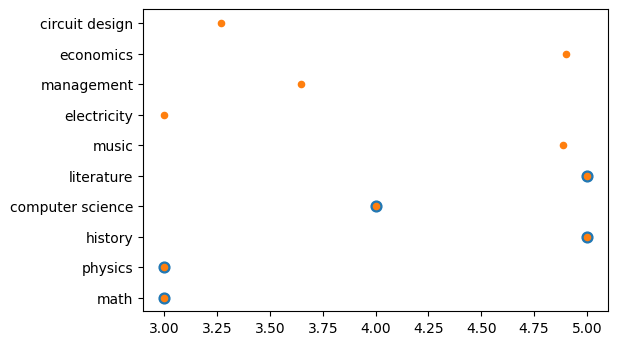

In [27]:
import matplotlib.pyplot as plt

plt.figure(0, dpi = 100)
plt.scatter(st_df.loc[1], st_df.loc[0], 60)
plt.scatter(st_df.loc['predicted'], st_df.loc[0], 20)


In [ ]:
!pip install anvil-uplink

In [29]:
import os
import anvil.server

def excel_to_blobmedia(filepath):
    df = pd.read_excel(filepath, skiprows = 0)# read student's data
    content = io.BytesIO()
    df.to_excel(content, index=False)
    content.seek(0, 0)

    head, tail = os.path.split(filepath)

    return anvil.BlobMedia(content=content.read(), content_type="application/vnd.ms-excel", name=tail)

filepath = '/content/StudentNeuralNetwork/student_data_in.xlsx'
df_in = predictByFile(filepath, R)

filepath = '/content/StudentNeuralNetwork/student_data_out.xlsx'
df_in.to_excel(filepath, index=False)

excel_to_blobmedia(filepath)

[2018 2019 2020]


BlobMedia[application/vnd.ms-excel,5257 bytes,name=student_data_out.xlsx]

In [31]:
import anvil.server
import pickle

@anvil.server.callable
# https://anvil.works/forum/t/upload-file-to-uplink-local-storage-using-file-loader/3693
def saveTable(file):
  with open('/content/StudentNeuralNetwork/student_data_in.xlsx', 'wb') as f:
    f.write(file.get_bytes())

@anvil.server.callable
def saveDataset(file):
  filepath = '/content/StudentNeuralNetwork/dataset.xlsx'
  with open(filepath, 'wb') as f:
    f.write(file.get_bytes())
  R = learnFromFile(filepath)
  pickle.dump( R, open( "/content/StudentNeuralNetwork/R.p", "wb" ) )
  return 'Dataset is loaded'

@anvil.server.callable
def callThePrediction():
  R = pickle.load( open( "/content/StudentNeuralNetwork/R.p", "rb" ) )
  df = predictByFile('/content/StudentNeuralNetwork/student_data_in.xlsx', R)
  df.to_excel('/content/StudentNeuralNetwork/student_data_out.xlsx', index=False)
  # https://anvil.works/forum/t/download-excel-file/7464/4
  media_out = excel_to_blobmedia(filepath)
  return media_out

anvil.server.connect('RMSJ4GHU4YIGH3T5VHOWSHL2-OHI7U7ZW5FYT3CYA')
anvil.server.wait_forever()

learning...
learning...
[2018 2019 2020]
learning...
[2018 2019 2020]


KeyboardInterrupt: ignored